In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [6]:
df = pd.read_csv(r'C:\Users\bansa\Desktop\Global_AI_Content_Impact_Dataset.csv')

In [8]:
df.head()

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


# AI Impact on revenue
Problem: Which industries or countries are seeing the highest revenue increases due to AI adoption? Use: Correlate AI Adoption Rate, Revenue Increase, and Industry via SQL queries and Python visualizations. Show trends in Power BI.

In [13]:
df.columns = df.columns.str.strip()

In [15]:
# Group by Country and Industry
grouped = df.groupby(['Country', 'Industry']).agg({
    'AI Adoption Rate (%)': 'mean',
    'Revenue Increase Due to AI (%)': 'mean'
}).reset_index()

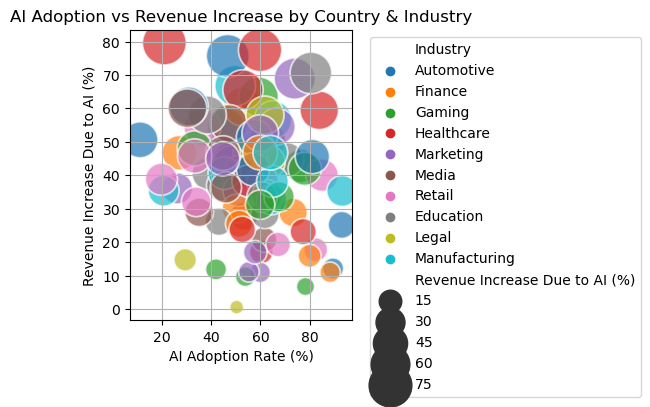

In [17]:
# Bubble plot
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=grouped,
    x='AI Adoption Rate (%)',
    y='Revenue Increase Due to AI (%)',
    size='Revenue Increase Due to AI (%)',
    hue='Industry',
    alpha=0.7,
    sizes=(100, 1000)
)
plt.title('AI Adoption vs Revenue Increase by Country & Industry')
plt.xlabel('AI Adoption Rate (%)')
plt.ylabel('Revenue Increase Due to AI (%)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Job Loss Risk Assessment
Problem: What is the projected risk of job loss due to AI in each country/industry? Use: Group by Industry or Country, calculate job loss averages, and visualize the most affected sectors.

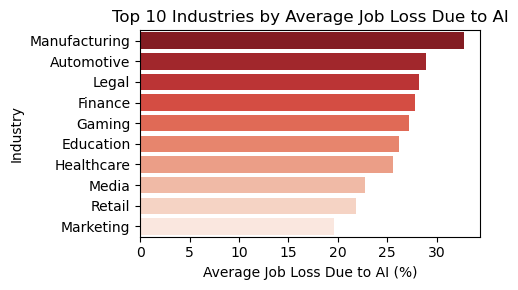

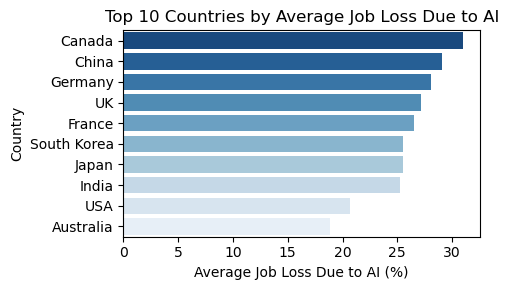

In [20]:
# Group by Industry and calculate average job loss
industry_risk = df.groupby("Industry")["Job Loss Due to AI (%)"].mean().sort_values(ascending=False)

# Group by Country and calculate average job loss
country_risk = df.groupby("Country")["Job Loss Due to AI (%)"].mean().sort_values(ascending=False)

# Plot: Top 10 Industries with Highest Job Loss Risk
plt.figure(figsize=(5,3))
sns.barplot(x=industry_risk.head(10).values, y=industry_risk.head(10).index, palette="Reds_r")
plt.title("Top 10 Industries by Average Job Loss Due to AI")
plt.xlabel("Average Job Loss Due to AI (%)")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

# Plot: Top 10 Countries with Highest Job Loss Risk
plt.figure(figsize=(5,3))
sns.barplot(x=country_risk.head(10).values, y=country_risk.head(10).index, palette="Blues_r")
plt.title("Top 10 Countries by Average Job Loss Due to AI")
plt.xlabel("Average Job Loss Due to AI (%)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# AI Tool Effectiveness Analysis
Problem: Which AI tools are associated with higher collaboration rates, content output, or revenue growth? Use: Use Python to group by Top AI Tools Used, and compare average metrics like Revenue Increase, Collaboration Rate.

                   Revenue Increase Due to AI (%)  \
Top AI Tools Used                                   
Synthesia                               44.572917   
ChatGPT                                 42.224516   
Stable Diffusion                        41.414074   
DALL-E                                  39.195385   
Bard                                    38.128750   
Claude                                  37.210968   
Midjourney                              36.737568   

                   Human-AI Collaboration Rate (%)  \
Top AI Tools Used                                    
Synthesia                                57.064583   
ChatGPT                                  58.167419   
Stable Diffusion                         54.330741   
DALL-E                                   58.225385   
Bard                                     50.379583   
Claude                                   50.729677   
Midjourney                               50.950541   

                   AI-Generated Con

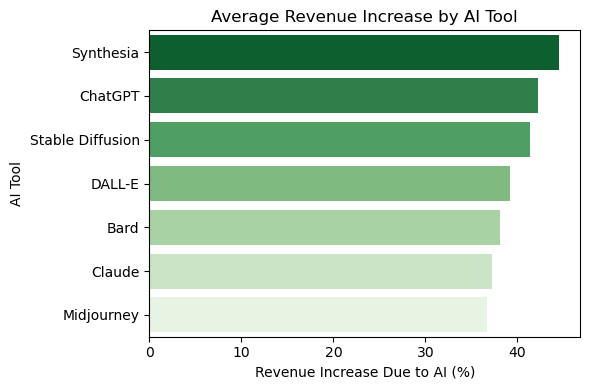

In [25]:
# Group by AI Tool and calculate average metrics
metrics = df.groupby("Top AI Tools Used")[[
    "Revenue Increase Due to AI (%)",
    "Human-AI Collaboration Rate (%)",
    "AI-Generated Content Volume (TBs per year)"
]].mean().sort_values(by="Revenue Increase Due to AI (%)", ascending=False)

print(metrics)

# Optional: visualize Revenue Increase by AI Tool
plt.figure(figsize=(6, 4))
sns.barplot(x=metrics["Revenue Increase Due to AI (%)"], y=metrics.index, palette="Greens_r")
plt.title("Average Revenue Increase by AI Tool")
plt.xlabel("Revenue Increase Due to AI (%)")
plt.ylabel("AI Tool")
plt.tight_layout()
plt.show()

# Regulation vs Innovation
Problem: Does stricter AI regulation affect adoption rates, revenue growth, or consumer trust? Use: Compare Strict, Moderate, and other Regulation Status types against other KPIs in Power BI dashboards.

  Regulation Status  AI Adoption Rate (%)  Revenue Increase Due to AI (%)  \
0           Lenient             51.590317                       43.001270   
1          Moderate             56.251974                       38.916842   
2            Strict             54.554590                       37.330000   

   Consumer Trust in AI (%)  
0                 61.392063  
1                 60.725526  
2                 55.773607  


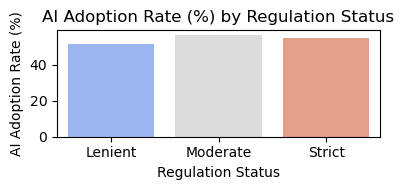

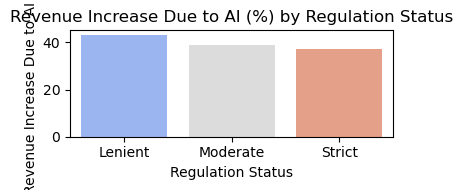

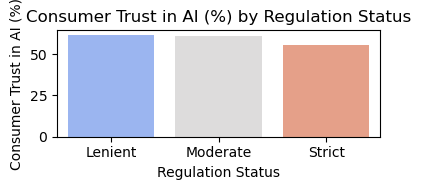

In [28]:
# Group by Regulation Status and calculate mean of selected KPIs
regulation_impact = df.groupby("Regulation Status")[[
    "AI Adoption Rate (%)",
    "Revenue Increase Due to AI (%)",
    "Consumer Trust in AI (%)"
]].mean().reset_index()

print(regulation_impact)

# Visualize comparison
kpis = ["AI Adoption Rate (%)", "Revenue Increase Due to AI (%)", "Consumer Trust in AI (%)"]

for kpi in kpis:
    plt.figure(figsize=(4,2))
    sns.barplot(x="Regulation Status", y=kpi, data=regulation_impact, palette="coolwarm")
    plt.title(f"{kpi} by Regulation Status")
    plt.ylabel(kpi)
    plt.xlabel("Regulation Status")
    plt.tight_layout()
    plt.show()

# Market Penetration Problem
Question: Which countries or industries are adopting AI the fastest? Use: Group by Country or Industry → average AI Adoption Rate (%).

